
# Volume 2: OpenGym



Nathan Schill

Section 2

Thurs. Mar. 16, 2023





In [1]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install gym[classic_control]
!pip install gym-toytext

!sudo apt-get install python3.10
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.10 1
!sudo update-alternatives --set python3 /usr/bin/python3.10

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 64.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 KB 26.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827648 sha256=5fc396abea1451bf992fba2de01a629ff406f2b87b5fe8bb45d9e974a2853450
  Stored in directory: /root/.cache/pip/wheels/af/2b/30/5e78b8b9599f2a2286a582b8da80594f654bf0e18d825a4405
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
Reading package lists... Done
Building dependency tree       
Reading state informatio

In [2]:
import gym
import gym_toytext
import random
import numpy as np
from IPython import display
from matplotlib import pyplot as plt

# Problem 1

*   Implement `random_blackjack()`.
*   Run the game 50,000 times and print the percentage of games that are wins.



In [113]:
# Problem 1
def random_blackjack(n):
    """
    Play a random game of Blackjack. Determine the
    percentage the player wins out of n times.
    Parameters:
        n (int): number of iterations
    Returns:
        percent (float): percentage that the player
                         wins
    """

    try:
        # Init environment
        env = gym.make('Blackjack-v1')
        env.reset()
        random_action = env.action_space.sample

        # Play n random games and record wins
        wins = 0
        for i in range(n):
            env.reset()
            
            # Take random actions until game terminates; record wins
            while True:
                _, win, done, _, _ = env.step(random_action())
                
                if done:
                    if win == 1:
                        wins += 1
                    break
        
        return wins/n
    
    finally:
        # Make sure to close env
        env.close()

In [114]:
# Percentage of wins after 50,000 games
random_blackjack(50000)

0.28298

# Problem 2

* Implement `blackjack()`.
* For `n` = 1, 2, ..., 21, plot the win percentage after 10,000 games of Blackjack.
* Identify which value of `n` gives the highest win rate.

In [163]:
# Problem 2
def blackjack(n=11):
    """
    Play blackjack with naive algorithm.
    Parameters:
        n (int): maximum accepted player hand
    Return:
        percent (float): percentage of 10000 iterations
                         that the player wins
    """
    if n < 1 or n > 21:
        raise ValueError('n should be between 1 and 21 inclusive')
    
    # Number of runs to test
    NUM_RUNS = 10000
    
    try:
        # Init environment
        env = gym.make('Blackjack-v1')
        env.reset()
        random_action = env.action_space.sample

        # Play n random games and record wins
        wins = 0
        for i in range(NUM_RUNS):
            (current_hand, _, _), _ = env.reset()
            
            # Hit until hand exceeds n
            # Note that 1 <= n <= 21, so don't need to check if done if
            # a hit loses the game by going over 21
            while current_hand <= n:
                (current_hand, _, _), win, done, _, _ = env.step(1)
            
            # Stick
            (current_hand, _, _), win, done, _, _ = env.step(0)

            # Game should now be over; record wins
            if win == 1:
                wins += 1
        
        return wins/NUM_RUNS
    
    finally:
        # Make sure to close env
        env.close()

0.4055

In [174]:
# Run simulation for 1 <= n <= 21
win_percentages = [None] * 21

for n in range(1, 21+1):
    win_percentages[n-1] = blackjack(n)

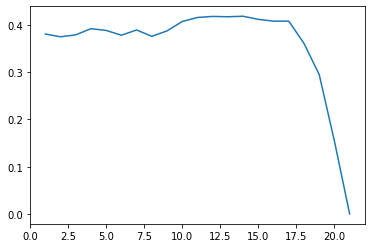

In [175]:
# Plot win percentages
plt.plot(np.arange(1, 21+1), win_percentages)
plt.show()

*Identify which value(s) give the highest win-rate here*

In [177]:
# The best-performing value of n
best_n = np.argmax(win_percentages) + 1
print('best n:', best_n)

best n: 14


# Problem 3

* Implement `cartpole()`.
* Render the game and run your function once.
* Run Cartpole 100 times (without rendering) and print out the average number of steps before it terminates.

In [229]:
# Problem 3
def cartpole(render=False):
    """
    Solve CartPole-v1 by checking the velocity
    of the tip of the pole.
    Parameters: 
        render (bool): If True, render environment at each step
    Return:
        iterations (integer): If render, number of steps survived;
            Else, average number of steps survived over NUM_TESTS runs
    """

    # Init environment
    env = gym.make('CartPole-v1', render_mode='rgb_array')
    env.reset()

    if render:
        NUM_TESTS = 1
    else:
        NUM_TESTS = 100
    
    # Accelerate the cart depending on the velocity of the pole, and visualize each step
    try:
        # This is cumulative across all NUM_TESTS experiments
        num_steps = 0
        for _ in range(NUM_TESTS):
            # Reset environment and get initial pole velocity
            obs, info = env.reset()
            pole_velocity = obs[3]

            if render:
                # Initialize visualization
                img = plt.imshow(env.render())

            # Step until done, recording the number of steps taken
            done = False
            while not done:
                # If pole moving left, push cart left
                if pole_velocity <= 0:
                    action = 0
                # Else, push cart right
                else:
                    action = 1
                
                # Step, get new pole velocity
                obs, reward, done, trunc, info = env.step(action)
                pole_velocity = obs[3]
                num_steps += reward

                if render:
                    # Update visualization
                    img.set_data(env.render())
                    display.display(plt.gcf())
                    display.clear_output(wait=True)
            
        return num_steps/NUM_TESTS
    
    finally:
        env.close()

225.0

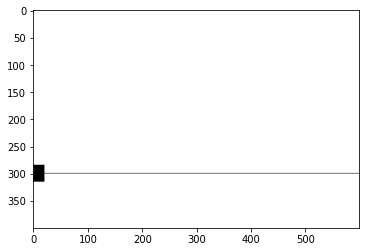

In [228]:
# Render the game and run once here
cartpole(True)

In [232]:
# Run the game here and print average steps to termination
cartpole(False)

199.53

# Problem 4

* Implement `car()`.
* Render the game and run your function once.
* Run MountainCar 100 times (without rendering) and print out the average number of steps before it terminates.

In [17]:
# Problem 4
def car(render=False):
    """
    Solve MountainCar-v0 by checking the position of the car.
    Parameters: 
        render (bool): If True, render environment at each step
    Return:
        iterations (integer): If render, number of steps survived;
            Else, average number of steps survived over NUM_TESTS runs
    """
    # Based on the velocity formula in the docs, the middle of the
    # valley is at position = -pi/6 ~ -0.524.
    # But a solution doesn't require position, just velocity
    MIDDLE = -np.pi/6
    
    # Init environment
    env = gym.make('MountainCar-v0', render_mode='rgb_array')
    env.reset()

    if render:
        NUM_TESTS = 1
    else:
        NUM_TESTS = 100
    
    # Accelearte the car depending on its position and velocity, and visualize each step
    try:
        # This is cumulative across all NUM_TESTS experiments
        num_steps = 0
        for _ in range(NUM_TESTS):
            # Reset and get initial car position and velocity
            obs, info = env.reset()
            position, velocity = obs

            if render:
                # Initialize visualization
                img = plt.imshow(env.render())

            # Step until done, recording the number of steps taken
            done = False
            while not done:
                # Note that the left wall immediately sets velocity to zero
                # If car is going left,
                if velocity < 0:
                    # acclerate left
                    action = 0
                else:
                    # acclerate right
                    action = 2

                # Step, get new car position and velocity
                obs, reward, done, trunc, info = env.step(action)
                position, velocity = obs
                
                num_steps += 1

                if render:
                    # Update visualization
                    img.set_data(env.render())
                    display.display(plt.gcf())
                    display.clear_output(wait=True)
            
        return num_steps/NUM_TESTS
    
    finally:
        env.close()

124.0

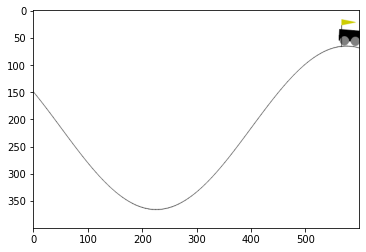

In [18]:
# Render the game here
car(True)

In [19]:
# Run the game here and print average steps to termination
car(False)

119.99

## Helper Function for Problem 5

In [27]:
def find_qvalues(env,alpha=.1,gamma=.6,epsilon=.1):
    """
    Use the Q-learning algorithm to find qvalues.
    Parameters:
        env (str): environment name
        alpha (float): learning rate
        gamma (float): discount factor
        epsilon (float): maximum value
    Returns:
        q_table (ndarray nxm)
    """
    # Make environment
    env = gym.make(env)
    # Make Q-table
    q_table = np.zeros((env.observation_space.n, env.action_space.n))

    # Train
    for i in range(1, 100001):
        # Reset state
        state, info = env.reset()

        epochs, penalties, reward, = 0, 0, 0
        done = False

        while not done:
            # Accept based on alpha
            if random.uniform(0,1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state])

            # Take action
            next_state, reward, done, truncated, info = env.step(action)

            # Calculate new qvalue
            old_value = q_table[state,action]
            next_max = np.max(q_table[next_state])

            new_value = (1-alpha) * old_value + alpha * (reward + gamma * next_max)
            q_table[state, action] = new_value

            # Check if penalty is made
            if reward == -10:
                penalties += 1

            # Get next observation
            state = next_state
            epochs += 1

        # Print episode number
        if i % 100 == 0:
            display.clear_output(wait=True)
            print(f'Episode: {i}')

    print('Training finished.')
    return q_table

# Problem 5

* Initialize the "`Taxi-v3`" environment (without rendering), act randomly until it terminates, and print the total reward
* Render the "`Taxi-v3`" environment, use the Q-table to act optimally until it terminates, and print the total reward
* Implement `taxi()`, then use it to print the average total reward for each algorithm.


In [71]:
# Random actions Taxi game
TOTALLY_RANDOM = True
try:
    # Init environment
    env = gym.make('Taxi-v3')
    _, info = env.reset()
    random_action = env.action_space.sample

    # Iterate until termination
    done = False
    rand_reward = 0
    while not done:
        # Take random steps until terminating
        if TOTALLY_RANDOM:
            _, reward, done, _, _ = env.step(random_action())
        # Mask non-modifying actions
        else:
            _, reward, done, _, info = env.step(env.action_space.sample(info['action_mask']))
        
        rand_reward += reward
    
    print(rand_reward)

finally:
    env.close()

-4766


In [28]:
# Train (get q-table)
qtable = find_qvalues('Taxi-v3')

Episode: 100000
Training finished.


In [73]:
# Q-table actions Taxi game
try:
    # Init environment
    env = gym.make('Taxi-v3')
    obs, info = env.reset()

    # Iterate until termination
    done = False
    q_reward = 0
    while not done:
        # Use the qtable to choose the next action
        action = np.argmax(qtable[obs])
        obs, reward, done, trunc, info = env.step(action)
        q_reward += reward
    
    print(q_reward)

finally:
    env.close()

6


In [76]:
def taxi(q_table):
    """
    Compare naive and q-learning algorithms.
    Parameters:
        q_table (ndarray nxm): table of qvalues
    Returns:
        naive (float): mean reward of naive algorithm
                       of 1000 runs
        q_reward (float): mean reward of Q-learning algorithm
                          of 1000 runs
    """
    NUM_TESTS = 1000

    ### Play random game
    # This is cumulative and will be averaged using NUM_TESTS later
    rand_reward = 0
    TOTALLY_RANDOM = True
    try:
        # Init environment
        env = gym.make('Taxi-v3')
        _, info = env.reset()
        random_action = env.action_space.sample

        # Run NUM_TESTS experiments
        for _ in range(NUM_TESTS):
            # Reset env and get initial state
            _, info = env.reset()

            # Iterate until termination
            done = False
            while not done:
                # Take random steps until terminating
                if TOTALLY_RANDOM:
                    _, reward, done, _, _ = env.step(random_action())
                # Mask non-modifying actions
                else:
                    _, reward, done, _, info = env.step(env.action_space.sample(info['action_mask']))
                
                rand_reward += reward

    finally:
        env.close()

    ### Play Q-table game
    # This is again cumulative
    q_reward = 0
    try:
        # Init environment
        env = gym.make('Taxi-v3')
        obs, info = env.reset()

        # Run NUM_TESTS experiments
        for _ in range(NUM_TESTS):
            # Reset env and get initial state
            obs, info = env.reset()

            # Iterate until termination
            done = False
            while not done:
                # Use the qtable to choose the next action
                action = np.argmax(qtable[obs])
                obs, reward, done, trunc, info = env.step(action)
                q_reward += reward

    finally:
        env.close()
    
    return rand_reward/NUM_TESTS, q_reward/NUM_TESTS

In [77]:
# Print the average rewards of the Taxi game for both algorithms run 1000 times
taxi(qtable)

(-9183.246, 7.887)